<a href="https://colab.research.google.com/github/mohripan/Belajar-NLP/blob/main/NLP_Submissions_Dicoding_Terapan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Diri

Nama: Mohammad Ripan Saiful Mansur

Linkedin: https://www.linkedin.com/in/mohammad-ripan-b68522141/

Dicoding: https://www.dicoding.com/users/mohrip16/academies

# 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 3. Pendahuluan

Notebook ini dibuat dengan alasan untuk menyelesaikan proyek submission awal untuk kursus Machine Learning Terapan di Dicoding Academy. Dalam proyek ini, saya akan membangun language model dimana terdapat LSTM layer di dalamnya menggunakan TensorFlow yang dijalankan di Google Colab. Dataset yang digunakan merupakan multiclass-klasifikasi kategori keluhan.

*Dataset yang didapatkan terinspirasi dari artikel berikut:* https://www.analyticsvidhya.com/blog/2021/11/a-guide-to-building-an-end-to-end-multiclass-text-classification-model/

Dengan perbedaan saya menerapkan metode *Deep Learning* daripada *Machine Learning* tradisional.

Tujuan utama dari proyek ini adalah untuk mengenali kategori dari keluhan yang disampaikan oleh pelanggan dengan akurasi minimal 75%. Proyek ini dirancang untuk menunjukkan kemampuan menerapkan ilmu *Machine Learning* ke dalam studi kasus NLP.

# 4. Learning Objectives

# 5. Download Dataset

In [2]:
!wget https://files.consumerfinance.gov/ccdb/complaints.csv.zip

--2024-01-20 11:22:40--  https://files.consumerfinance.gov/ccdb/complaints.csv.zip
Resolving files.consumerfinance.gov (files.consumerfinance.gov)... 13.227.74.68, 13.227.74.3, 13.227.74.63, ...
Connecting to files.consumerfinance.gov (files.consumerfinance.gov)|13.227.74.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 684912344 (653M) [binary/octet-stream]
Saving to: ‘complaints.csv.zip’

complaints.csv.zip  100%[===================>] 653.18M  21.7MB/s    in 31s     

2024-01-20 11:23:12 (20.9 MB/s) - ‘complaints.csv.zip’ saved [684912344/684912344]



In [3]:
!mkdir dataset

In [4]:
!unzip /content/complaints.csv.zip -d dataset

Archive:  /content/complaints.csv.zip
  inflating: dataset/complaints.csv  


In [5]:
!wget https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip

--2024-01-20 11:23:46--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.02MB/s    in 2m 39s  

2024-01-20 11:26:26 (5.18 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [6]:
!mkdir glove

In [7]:
!unzip /content/glove.6B.zip -d glove

Archive:  /content/glove.6B.zip
  inflating: glove/glove.6B.50d.txt  
  inflating: glove/glove.6B.100d.txt  
  inflating: glove/glove.6B.200d.txt  
  inflating: glove/glove.6B.300d.txt  


# 6. Data Understanding

In [8]:
df = pd.read_csv('dataset/complaints.csv')
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-01-12,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NJ,073XX,NaN,NaN,Web,2024-01-12,In progress,Yes,NaN,8153221
1,2024-01-13,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33401,NaN,Other,Web,2024-01-13,In progress,Yes,NaN,8154057
2,2024-01-12,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,76021,NaN,NaN,Web,2024-01-12,In progress,Yes,NaN,8161801
3,2023-11-15,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,MD,21218,NaN,Consent not provided,Web,2023-11-15,In progress,Yes,NaN,7858590
4,2023-11-15,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,Experian Information Solutions Inc.,FL,33311,NaN,Consent not provided,Web,2023-11-15,In progress,Yes,NaN,7853135


In [9]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [10]:
df.info

<bound method DataFrame.info of         Date received                                            Product  \
0          2024-01-12  Credit reporting or other personal consumer re...   
1          2024-01-13  Credit reporting or other personal consumer re...   
2          2024-01-12  Credit reporting or other personal consumer re...   
3          2023-11-15  Credit reporting or other personal consumer re...   
4          2023-11-15  Credit reporting or other personal consumer re...   
...               ...                                                ...   
4554297    2023-08-02  Credit reporting, credit repair services, or o...   
4554298    2023-08-02          Payday loan, title loan, or personal loan   
4554299    2023-08-02                                           Mortgage   
4554300    2023-08-02  Credit reporting, credit repair services, or o...   
4554301    2023-08-04          Payday loan, title loan, or personal loan   

              Sub-product                              

In [11]:
# Create a new dataframe with two columns
df1 = df[['Product', 'Consumer complaint narrative']].copy()
# Remove missing values (NaN)
df1 = df1[pd.notnull(df1['Consumer complaint narrative'])]
# Renaming second column for a simpler name
df1.columns = ['Product', 'Consumer_complaint']
print(df1.shape)
df1.head(3).T

(1650779, 2)


,10,11,13
Product,Credit reporting or other personal consumer re...,Credit reporting or other personal consumer re...,Credit reporting or other personal consumer re...
Consumer_complaint,I have not authorized these inquiries and am o...,In accordance with the Fair Credit Reporting a...,Have accounts where Ive been charged a lot of ...


In [12]:
# Selecting the categories
selected_categories = [
    'Mortgage',
    'Credit reporting, credit repair services, or other personal consumer reports',
    'Student loan',
    'Debt collection'
]

# Filtering the DataFrame
df_selected = df1[df1['Product'].isin(selected_categories)]

# Balancing the dataset
# Determine the minimum count among the selected categories
min_count = df_selected['Product'].value_counts().min()

# Sample from each category
df_balanced = pd.DataFrame()
for category in selected_categories:
  category_df = df_selected[df_selected['Product'] == category].sample(min_count, random_state=1)
  df_balanced = pd.concat([df_balanced, category_df])

# If the total count is less than 25000, adjust the sampling from each category
total_count = df_balanced.shape[0]
if total_count < 25000:
  additional_samples_per_category = (25000 - total_count) // len(selected_categories)
  for category in selected_categories:
    additional_samples = df_selected[df_selected['Product'] == category].sample(additional_samples_per_category, random_state=1)
    df_balanced = pd.concat([df_balanced, additional_samples])

# Check the final distribution and total count
print(df_balanced['Product'].value_counts())
print("Total count:", df_balanced.shape[0])

Mortgage                                                                        39249
Credit reporting, credit repair services, or other personal consumer reports    39249
Student loan                                                                    39249
Debt collection                                                                 39249
Name: Product, dtype: int64
Total count: 156996


In [13]:
# Because the computation is time consuming (in terms of CPU), the data was sampled
df2 = df_balanced.sample(25000, random_state=1).copy()

In [14]:
pd.DataFrame(df2.Product.unique())

,0
0,Debt collection
1,Mortgage
2,Student loan
3,"Credit reporting, credit repair services, or o..."


In [15]:
# Create a new column 'category_id' with encoded categories
df2['category_id'] = df2['Product'].factorize()[0]
category_id_df = df2[['Product', 'category_id']].drop_duplicates()
# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
# New dataframe
df2.head()

,Product,Consumer_complaint,category_id
3700943,Debt collection,This a individual loan that has been reported ...,0
2066192,Mortgage,The Bank of America has responded but still th...,1
4282091,Student loan,MOHELA has caused significant difficulty durin...,2
3349815,Student loan,I started attending XXXX XXXX in XX/XX/2009. I...,2
3144469,Student loan,"To Whom It May Concern, This is the same compl...",2


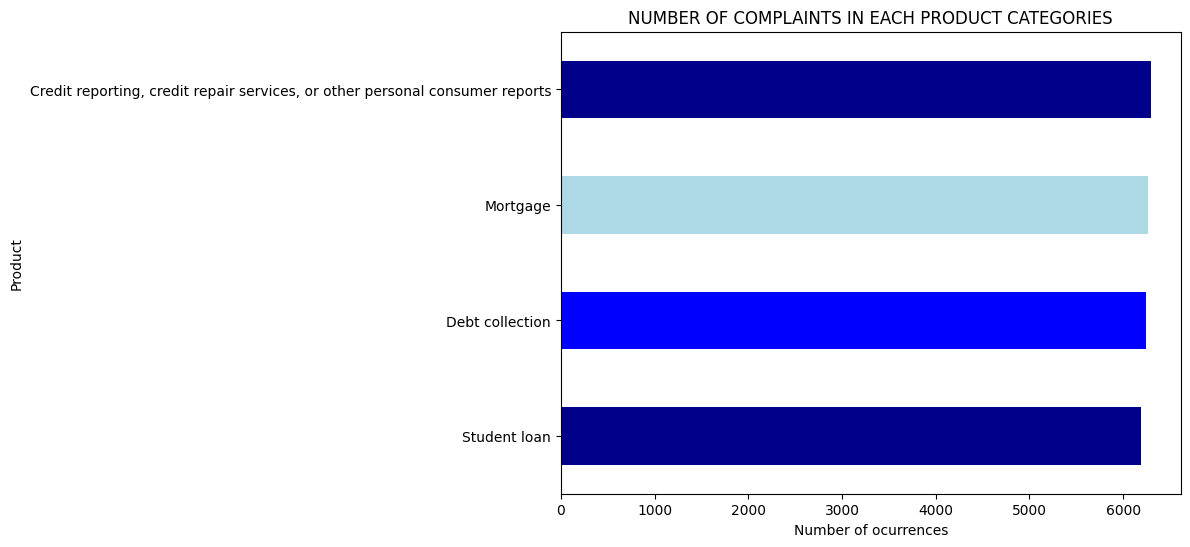

In [16]:
fig = plt.figure(figsize=(8,6))
colors = ['darkblue','blue','lightblue']
df2.groupby('Product').Consumer_complaint.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORIES')
plt.xlabel('Number of ocurrences', fontsize = 10);

# 7. Data Preprocessing

In [17]:
X = df2['Consumer_complaint']
y = df2['Product']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state = 0)

In [18]:
# Create a label encoder object
label_encoder = LabelEncoder()

# Fit the encoder on the labels
label_encoder.fit(df2['Product'])

# Transform labels to integer values
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# 8. Pembuatan Model

In [19]:
class SaveBestModelCallback(Callback):
  def __init__(self, model, filepath, accuracy_threshold=0.90):
    super(SaveBestModelCallback, self).__init__()
    self.model = model
    self.filepath = filepath
    self.accuracy_threshold = accuracy_threshold
    self.best_combined_accuracy = 0

  def on_epoch_end(self, epoch, logs=None):
    logs = logs or {}
    train_accuracy = logs.get('accuracy')
    val_accuracy = logs.get('val_accuracy')
    if train_accuracy and val_accuracy:
      # Calculate weighted accuracy (10% train, 90% val)
      weighted_accuracy = 0.1 * train_accuracy + 0.9 * val_accuracy
      # Check if both accuracies are above threshold and weighted accuracy is the best so far
      if train_accuracy > self.accuracy_threshold and val_accuracy > self.accuracy_threshold and weighted_accuracy > self.best_combined_accuracy:
        self.best_combined_accuracy = weighted_accuracy  # Update the best weighted accuracy
        self.model.save(self.filepath)
        print(f"Epoch {epoch + 1}: Model saved with train accuracy: {train_accuracy*100:.2f}% and val accuracy: {val_accuracy*100:.2f}%")

In [20]:
glove_embeddings = {}
with open('/content/glove/glove.6B.200d.txt', 'r', encoding='utf-8') as file:
  for line in file:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], dtype='float32')
    glove_embeddings[word] = vector

In [21]:
@tf.keras.utils.register_keras_serializable()
class AttentionLayer(Layer):
  def __init__(self, **kwargs):
    super(AttentionLayer, self).__init__(**kwargs)

  def build(self, input_shape):
    self.W = self.add_weight(name='attention_weight',
                            shape=(input_shape[-1], 1),
                            initializer='random_normal',
                            trainable=True)
    self.b = self.add_weight(name='attention_bias',
                            shape=(input_shape[1], 1),
                            initializer='zeros',
                            trainable=True)
    super(AttentionLayer, self).build(input_shape)

  def call(self, inputs):
    e = tf.tanh(tf.keras.backend.dot(inputs, self.W) + self.b)
    a = tf.keras.backend.softmax(e, axis=1)
    output = inputs * a
    return tf.keras.backend.sum(output, axis=1)

  def get_config(self):
    return super(AttentionLayer, self).get_config()

In [22]:
# Parameters for tokenization and padding
vocab_size = 400000
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

# Tokenize and pad the sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

embedding_dim = 200
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
  if i < vocab_size:
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Adjusted model architecture
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length, weights=[embedding_matrix], trainable=True),
    Bidirectional(LSTM(256, return_sequences=True)),
    AttentionLayer(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

learning_rate = 0.0005
optimizer = tf.keras.optimizers.AdamW(learning_rate=learning_rate, weight_decay=0.01)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

save_model_callback = SaveBestModelCallback(model, 'best_model.keras')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max')

history = model.fit(X_train_padded, y_train_encoded,
                    epochs=15,
                    validation_data=(X_test_padded, y_test_encoded),
                    callbacks=[save_model_callback, early_stopping])

Epoch 1/15
625/625 [==============================] - 91s 135ms/step - loss: 0.5446 - accuracy: 0.7936 - val_loss: 0.3634 - val_accuracy: 0.8706
Epoch 2/15
625/625 [==============================] - 46s 74ms/step - loss: 0.3105 - accuracy: 0.8946 - val_loss: 0.3057 - val_accuracy: 0.8910
Epoch 3/15
625/625 [==============================] - 43s 69ms/step - loss: 0.2490 - accuracy: 0.9189 - val_loss: 0.2867 - val_accuracy: 0.8990
Epoch 4/15
625/625 [==============================] - 56s 90ms/step - loss: 0.2021 - accuracy: 0.9329 - val_loss: 0.2708 - val_accuracy: 0.9090
Epoch 5/15
625/625 [==============================] - 40s 65ms/step - loss: 0.1617 - accuracy: 0.9460 - val_loss: 0.2883 - val_accuracy: 0.9070
Epoch 6/15
625/625 [==============================] - 39s 62ms/step - loss: 0.1261 - accuracy: 0.9592 - val_loss: 0.3415 - val_accuracy: 0.8978
Epoch 7/15
625/625 [==============================] - 47s 75ms/step - loss: 0.0950 - accuracy: 0.9696 - val_loss: 0.3358 - val_accuracy

# 9. Model Evaluation

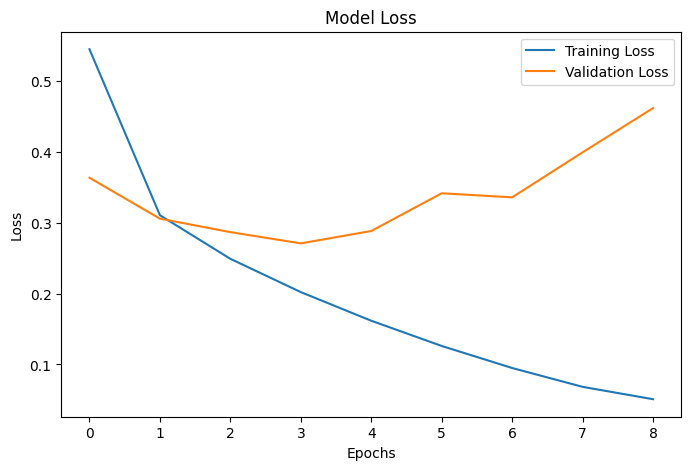

In [23]:
# Plotting training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [24]:
# Load the saved model
loaded_model = tf.keras.models.load_model('best_model.keras')

In [25]:
train_loss, train_accuracy = loaded_model.evaluate(X_train_padded, y_train_encoded)
print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_accuracy}")

val_loss, val_accuracy = loaded_model.evaluate(X_test_padded, y_test_encoded)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

625/625 [==============================] - 8s 11ms/step - loss: 0.0612 - accuracy: 0.9807
Train Loss: 0.06124409660696983
Train Accuracy: 0.980650007724762
157/157 [==============================] - 3s 12ms/step - loss: 0.3358 - accuracy: 0.9080
Validation Loss: 0.3357540965080261
Validation Accuracy: 0.9079999923706055


In [26]:
def compute_metrics(labels, predictions, num_classes):
  cm = tf.math.confusion_matrix(labels, predictions, num_classes=num_classes)
  diag_sum = tf.linalg.diag_part(cm)
  precision = diag_sum / tf.reduce_sum(cm, axis=0)
  recall = diag_sum / tf.reduce_sum(cm, axis=1)
  f1_score = 2 * precision * recall / (precision + recall)

  return precision.numpy(), recall.numpy(), f1_score.numpy()

In [27]:
# Predictions on the training and validation sets
y_train_pred = loaded_model.predict(X_train_padded)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_test_pred = loaded_model.predict(X_test_padded)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Number of classes
num_classes = len(label_encoder.classes_)

# Compute metrics for training set
train_precision, train_recall, train_f1_score = compute_metrics(y_train_encoded, y_train_pred_classes, num_classes)
print("Training Metrics:")
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1 Score:", train_f1_score)

# Compute metrics for validation set
test_precision, test_recall, test_f1_score = compute_metrics(y_test_encoded, y_test_pred_classes, num_classes)
print("Validation Metrics:")
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1_score)

157/157 [==============================] - 2s 11ms/step
Training Metrics:
Precision: [0.98341523 0.9600939  0.99123331 0.9883651 ]
Recall: [0.94996044 0.98337007 0.99440336 0.99535354]
F1 Score: [0.96639839 0.9715926  0.99281581 0.99184701]
Validation Metrics:
Precision: [0.91109155 0.83955224 0.95321174 0.93269992]
Recall: [0.83199357 0.9        0.94944708 0.95      ]
F1 Score: [0.8697479  0.86872587 0.95132568 0.94127048]


# 10. Test Model

In [28]:
df2.head()

,Product,Consumer_complaint,category_id
3700943,Debt collection,This a individual loan that has been reported ...,0
2066192,Mortgage,The Bank of America has responded but still th...,1
4282091,Student loan,MOHELA has caused significant difficulty durin...,2
3349815,Student loan,I started attending XXXX XXXX in XX/XX/2009. I...,2
3144469,Student loan,"To Whom It May Concern, This is the same compl...",2


In [29]:
def preprocess_text(text):
  sequence = tokenizer.texts_to_sequences([text])
  padded = pad_sequences(sequence, maxlen=max_length, padding=padding_type, truncating=trunc_type)
  return padded

complaint = df2['Consumer_complaint'].iloc[0]

processed_complaint = preprocess_text(complaint)

prediction = model.predict(processed_complaint)
predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])
print("Predicted Category:", predicted_label[0])

1/1 [==============================] - 1s 746ms/step
Predicted Category: Debt collection
